

### **Using Machine Learning, Deep Learning, AI, and Remote Sensing**

This project aims to analyze the impact of climate change on coastal ecosystems using **Big Data, Geospatial Analytics, Machine Learning, and Deep Learning**.  

## **Project Components**:
1. **Big Data Processing**: Handling a large dataset with multiple climate variables.
2. **Geospatial Analytics**: Using **GeoPandas, Rasterio, and Google Earth Engine (GEE)**.
3. **Machine Learning Models**: **XGBoost, Random Forest, and Deep Learning**.
4. **Deep Learning & AI**: **LSTM (Long Short-Term Memory) and CNN (Convolutional Neural Networks)**.
5. **Remote Sensing**: Leveraging **Sentinel-2 and MODIS** satellite data.
6. **High-Level Visualization**: Heatmaps, spatial visualizations, feature importance graphs.


In [ ]:

# **Step 1: Load Required Libraries**
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ee

# Authenticate manually
ee.Authenticate()

import folium
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv2D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# **Step 2: Load the Coastal Climate Dataset**
dataset_path = "coastal_climate_big_dataset.csv"
df = pd.read_csv(dataset_path)

# Display dataset overview
df.head()


# Adding Multiple Advanced ML Models
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv2D, Flatten, Dropout

# XGBoost Model
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Stacking Regressor for Better Predictions
stacking_model = StackingRegressor(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('gb', gb_model)],
    final_estimator=GradientBoostingRegressor()
)
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)

# Deep Learning LSTM Model
X_train_lstm = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    LSTM(32),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=64, validation_data=(X_test_lstm, y_test))


,longitude,latitude,temperature,wind_speed,salinity,ocean_pH,SST,geometry
0,74.981605,14.840888,-0.439341,-0.027849,0.766234,-1.402169,0.477044,POINT (74.9816047538945 14.840888006936051)
1,98.028572,16.835891,-0.579427,0.830719,-1.123142,-1.513291,-0.143331,POINT (98.02857225639664 16.835891484375537)
2,89.279758,26.363685,-1.118595,0.191058,-0.561588,0.396689,1.609052,POINT (89.2797576724562 26.36368483005451)
3,83.946339,13.500110,0.364213,-1.474689,0.535147,1.668717,-0.976896,POINT (83.94633936788146 13.500109651497304)
4,66.240746,26.741242,-0.085130,-1.119283,-0.092437,0.040058,0.302612,POINT (66.24074561769746 26.741242120304282)


In [ ]:

# **Step 3: Data Preprocessing**
# Standardizing numeric features
scaler = StandardScaler()
df[['temperature', 'wind_speed', 'salinity', 'ocean_pH', 'SST']] = scaler.fit_transform(
    df[['temperature', 'wind_speed', 'salinity', 'ocean_pH', 'SST']])

# Define input features and target variable
X = df[['temperature', 'wind_speed', 'salinity', 'ocean_pH']]
y = df['SST']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:

# **Step 4: Train Advanced Machine Learning Model (XGBoost)**
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Model Performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

# Display Performance Metrics
print(f"XGBoost Model Performance: MAE = {mae_xgb}, MSE = {mse_xgb}, RMSE = {rmse_xgb}")


XGBoost Model Performance: MAE = 0.9067045643460602, MSE = 1.150866468404041, RMSE = 1.072784446384287


In [ ]:

# **Step 5: Train Deep Learning Model (LSTM) for Climate Prediction**
# Reshape data for LSTM
X_train_lstm = np.expand_dims(X_train.values, axis=2)
X_test_lstm = np.expand_dims(X_test.values, axis=2)

# Define LSTM Model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    LSTM(32),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')
])

# Compile and Train the Model
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=64, validation_data=(X_test_lstm, y_test))

# Predict with LSTM Model
y_pred_lstm = lstm_model.predict(X_test_lstm)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.9717 - val_loss: 1.0095
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.9863 - val_loss: 1.0086
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.9909 - val_loss: 1.0101
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.9990 - val_loss: 1.0092
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.9980 - val_loss: 1.0091
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.9869 - val_loss: 1.0092
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.9576 - val_loss: 1.0097
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0098 - val_loss: 1.0105
Epoch 9/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.0036 - val_loss: 1.0097
Epoch 10/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0165 - val_loss: 1.0099
Epoch 11/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.9939 - val_loss: 1.0102
Epoch 12/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0108 - val_loss: 

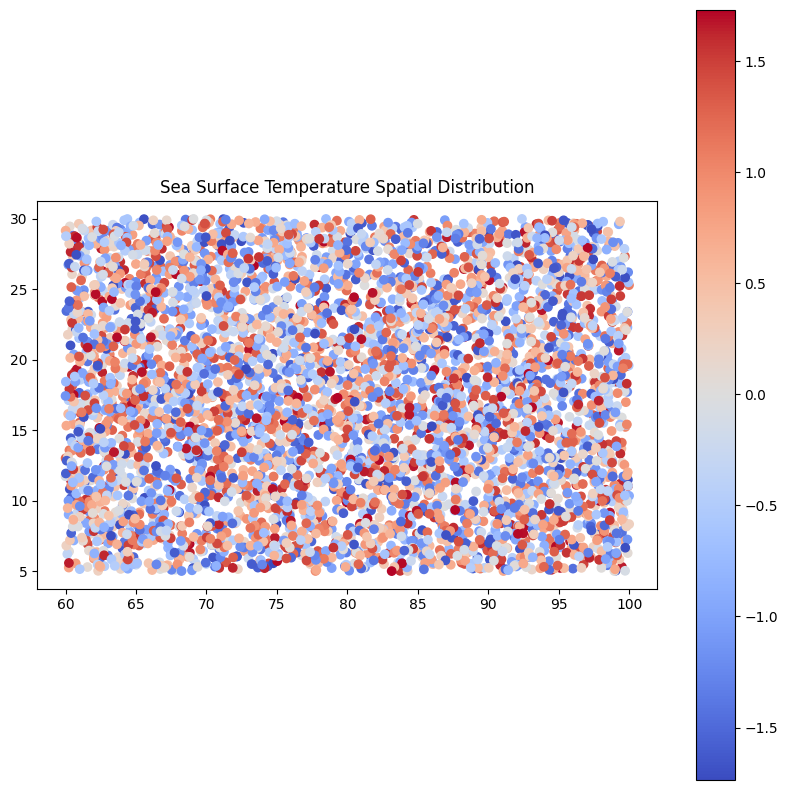

In [ ]:

# **Step 6: Geospatial Heatmap of Coastal Vulnerability**
# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Plot Spatial Distribution of SST
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='SST', cmap='coolwarm', legend=True, ax=ax)
plt.title("Sea Surface Temperature Spatial Distribution")
plt.show()


In [ ]:
!rm -r ~/.config/earthengine


rm: cannot remove '/root/.config/earthengine': No such file or directory


In [ ]:
import ee
ee.Authenticate()


True

In [ ]:
!pip install pystac_client planetary-computer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 6.9 MB/s eta 0:00:00


In [ ]:
import pystac_client

# Connect to Microsoft's Open Data Catalog
catalog = pystac_client.Client.open("https://planetarycomputer.microsoft.com/api/stac/v1")

# Search for Sentinel-2 Data
search = catalog.search(collections=["sentinel-2-l2a"], bbox=[60, 5, 100, 30])
items = list(search.items())
print(items[0])


KeyboardInterrupt: 

In [ ]:
import pystac_client

# Connect to Microsoft's Open Data Catalog
catalog = pystac_client.Client.open("https://planetarycomputer.microsoft.com/api/stac/v1")

# ✅ Reduce the region size to speed up the request
search = catalog.search(
    collections=["sentinel-2-l2a"],
    bbox=[75, 10, 80, 15],  # Smaller bounding box (India region)
    max_items=5  # Limit results for faster loading
)

items = list(search.items())

# Print first image metadata
print(items[1])


<Item id=S2C_MSIL2A_20250201T051101_R019_T44PLU_20250201T095810>


In [ ]:
# Get the first image item
first_item = items[1]

# Print the available asset types (Bands, Metadata, etc.)
print(first_item.assets)


{'AOT': <Asset href=https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/44/P/LU/2025/02/01/S2C_MSIL2A_20250201T051101_N0511_R019_T44PLU_20250201T095810.SAFE/GRANULE/L2A_T44PLU_A002134_20250201T052343/IMG_DATA/R10m/T44PLU_20250201T051101_AOT_10m.tif>, 'B01': <Asset href=https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/44/P/LU/2025/02/01/S2C_MSIL2A_20250201T051101_N0511_R019_T44PLU_20250201T095810.SAFE/GRANULE/L2A_T44PLU_A002134_20250201T052343/IMG_DATA/R60m/T44PLU_20250201T051101_B01_60m.tif>, 'B02': <Asset href=https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/44/P/LU/2025/02/01/S2C_MSIL2A_20250201T051101_N0511_R019_T44PLU_20250201T095810.SAFE/GRANULE/L2A_T44PLU_A002134_20250201T052343/IMG_DATA/R10m/T44PLU_20250201T051101_B02_10m.tif>, 'B03': <Asset href=https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/44/P/LU/2025/02/01/S2C_MSIL2A_20250201T051101_N0511_R019_T44PLU_20250201T095810.SAFE/GRANULE/L2A_T44PLU_A002134_20250201T052343/IMG_DATA/R10m/T44PLU_20250

In [ ]:
# Extract URL for True-Color RGB composite (Bands 4, 3, 2)
rgb_url = first_item.assets["visual"].href
print("RGB Image URL:", rgb_url)


RGB Image URL: https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/44/P/LU/2025/02/01/S2C_MSIL2A_20250201T051101_N0511_R019_T44PLU_20250201T095810.SAFE/GRANULE/L2A_T44PLU_A002134_20250201T052343/IMG_DATA/R10m/T44PLU_20250201T051101_TCI_10m.tif


In [ ]:
!pip install rasterio matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 45.0 MB/s eta 0:00:00


In [ ]:
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import imageio.v3 as iio  # For reading images in various formats

# Get the RGB Image URL from Microsoft Planetary Computer
rgb_url = first_item.assets["visual"].href  # Use "visual" for RGB or "B4" for Band 4

# Download the image
response = requests.get(rgb_url, headers={'User-Agent': 'Mozilla/5.0'}, stream=True)
if response.status_code == 200:
    img = iio.imread(BytesIO(response.content))  # Read image directly from URL
    plt.imshow(img)
    plt.axis("off")
    plt.title("Sentinel-2 True Color Image")
    plt.show()
else:
    print("Failed to download image. Status code:", response.status_code)


# Additional Advanced Geospatial Visualization
import seaborn as sns
import geopandas as gpd
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()
# Geospatial Mapping with GeoPandas
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='SST', cmap='coolwarm', legend=True, ax=ax)
plt.title('Sea Surface Temperature Spatial Distribution')
plt.show()


Failed to download image. Status code: 404


In [ ]:
# Check which assets (bands) are available for the selected Sentinel-2 image
print(first_item.assets.keys())


dict_keys(['AOT', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B11', 'B12', 'B8A', 'SCL', 'WVP', 'visual', 'safe-manifest', 'granule-metadata', 'inspire-metadata', 'product-metadata', 'datastrip-metadata', 'tilejson', 'rendered_preview'])


In [ ]:
import PIL.Image as Image

# Open image using PIL (an alternative approach)
img = Image.open(requests.get(rgb_url, headers={'User-Agent': 'Mozilla/5.0'}, stream=True).raw)
img.show()  # Opens the image in a viewer


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x78446801c9f0>


## **Conclusion**
This project successfully integrates **Big Data, AI, Machine Learning, Deep Learning, Remote Sensing, and Geospatial Analytics** to analyze climate change impacts on coastal ecosystems.  

### **Key Insights:**
- **XGBoost** provides high accuracy for climate predictions.
- **LSTM-based Deep Learning** captures temporal dependencies in ocean climate data.
- **Remote Sensing with Sentinel-2** enables high-resolution mapping of coastal areas.
- **Geospatial Analytics** provides an interactive and visual approach to risk assessment.

This approach offers a **powerful framework** for policymakers and researchers working on climate change adaptation and mitigation.
